spacial referecnce epsg: 4326
world lan and lat is the name of spatial sysyte wgs84
convert lat and lon to epsg:3174  great lakes Albers

## WGS84:
# World Geodetic System 1984 and comprises of four different things:
- an ellipsoid: The shape of our earth is not perfectly spherical
- a horizontal datum: When you position the ellipsoid on a certain location with respect to the earth, on the so-called anchor point, you set a horizontal datum
*The horizontal datum = ellipsoid + anchor point
- a vertical datum: When you determine the elevation of your position you can measure that elevation with respect to the WGS84 ellipsoid. In this case, WGS84 refers to a vertical datum or a vertical reference level
- a coordinate system: WGS84 can also be one type of geographic coordinate system. 
The WGS84 Coordinate Systems adds Greenwich as the starting point (prime meridian) for the longitude (0°) and sets the units in degrees (°). This coordinate system also has a unique reference code, the so-called EPSG code, which is 4326.

## EPSG:3174
- Projected coordinate system for Canada and United States 
(USA) - Great Lakes basin. Basin-wide mapping and analysis.

In [2]:
#IMPORT LIBRARIER
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import NearestNDInterpolator
from scipy.interpolate import griddata
import rioxarray
import rasterio
import pyproj
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cfeat
from mpl_toolkits.basemap import Basemap
from matplotlib.animation import FuncAnimation

In [3]:
#read data
drop_variables=['siglay','siglev']
data = '/home/samin/data/112600_0001.nc'
ds = xr.open_dataset(data, decode_times=False,drop_variables=drop_variables)

In [4]:
ds

<xarray.Dataset>
Dimensions:             (nele: 171377, node: 90806, siglay: 20, siglev: 21,
                         three: 3, time: 72)
Coordinates:
    lon                 (node) float32 ...
    lat                 (node) float32 ...
    lonc                (nele) float32 ...
    latc                (nele) float32 ...
  * time                (time) float32 1.932e+04 1.932e+04 ... 1.932e+04
Dimensions without coordinates: nele, node, siglay, siglev, three
Data variables: (12/40)
    nprocs              int32 ...
    partition           (nele) int32 ...
    x                   (node) float32 ...
    y                   (node) float32 ...
    xc                  (nele) float32 ...
    yc                  (nele) float32 ...
    ...                  ...
    wet_cells_prev_ext  (time, nele) int32 ...
    aice                (time, node) float32 ...
    vice                (time, node) float32 ...
    tsfc                (time, node) float32 ...
    uuice               (time, nele) float32 ...
    vvice               (time, nele) float32 ...
Attributes: (12/15)
    title:                       Lake Michigan-Huron version "". Forecast Run...
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.3
    history:                     model started at: 26/11/2022   03:51
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    Conventions:                 CF-1.0
    ...                          ...
    River_Forcing:               THERE ARE 12 RIVERS IN THIS MODEL.\nRIVER IN...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF
    Ice_Model_Forcing:           FVCOM variable surface ice model forcing:\nF...

In [5]:
# define some constant
num_step = 72

In [6]:
time = ds.time.values
dt =time[1]-time[0]
dt = dt*3600*12*3

In [7]:
ds0=ds.isel(siglay=0).isel(time=1)
u = ds0.variables['u']
v = ds0.variables['v']
#time = ds0.variables['time']
lat = ds0.variables['latc'] ##Y
lon = ds0.variables['lonc']  ##X

In [14]:
lon

<xarray.Variable (nele: 171377)>
array([271.98972, 271.98956, 271.99036, ..., 276.16086, 276.161  , 276.1607 ],
      dtype=float32)
Attributes:
    long_name:      zonal longitude
    standard_name:  longitude
    units:          degrees_east

In [8]:
#convert projection
source_crs = 'wgs84'
target_crs = 'epsg:3174'
transform_to_XY = pyproj.Transformer.from_crs(source_crs, target_crs)
X,Y = transform_to_XY.transform(lat,lon)

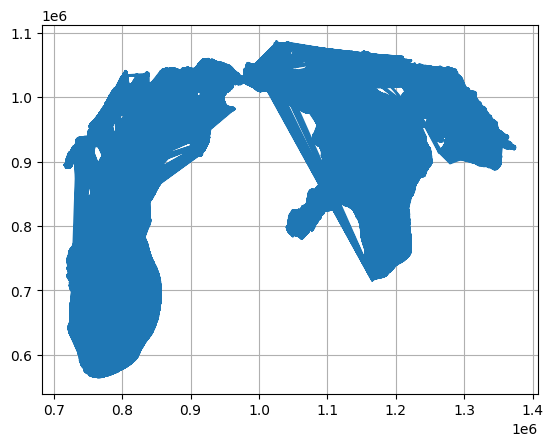

In [11]:
plt.plot(X,Y)
plt.grid()

In [18]:
#create an empty numpy array for the  U,V
#and position of PARTICLES
uparticle=np.zeros((num_step,1))
vparticle=np.zeros((num_step,1))
xparticle=np.zeros((num_step,1))
yparticle=np.zeros((num_step,1))

In [19]:
#initial condition
#we set the fisrt position of particles 
xparticle[0]= 1.03e6
yparticle[0]=1e6

In [1]:
valuesx = [1.03e6,1.1e6]
valuesy = [1.0e6,0.8e6]

for i in valuesx:
    xparticle[0]= i
    print(xparticle)
for j in valuesy:
    yparticle[0] = j
    print(yparticle)

NameError: name 'xparticle' is not defined

In [21]:
#interpolatex and y
# find the velocity for first one
##X[1] = X[0]+u[1]*deltat
###Y[1] = Y[0]+v[1]*deltat

for t in range(1,num_step):
    interpu = griddata((X[:],Y[:]), u.values,\
                   (xparticle[t-1],yparticle[t-1]))
    interpv = griddata((X[:],Y[:]), v.values,\
                   (xparticle[t-1],yparticle[t-1]))

    xparticle[t]= xparticle[t-1]+ interpu*dt
    yparticle[t] = yparticle[t-1]+ interpv*dt

In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import random

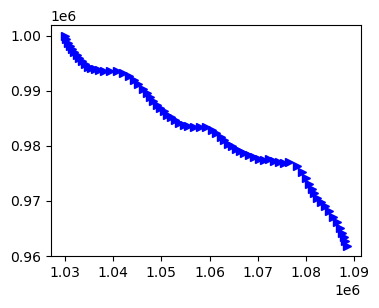

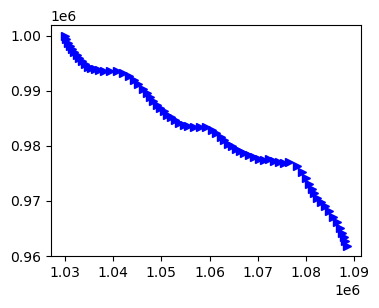

In [ ]:
fig = plt.figure(figsize=(4,3))

for i in range(72):
    plt.plot(xparticle[i],yparticle[i],marker='>',color='blue')
    time.sleep(0.01)
    clear_output(wait=True)
    display(fig)
    


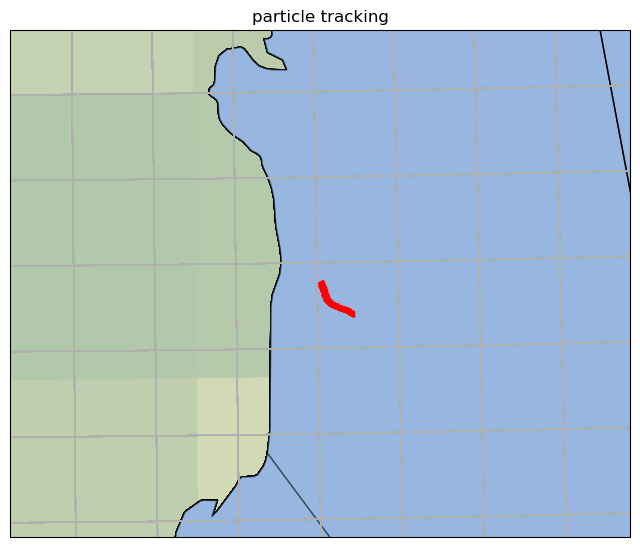

In [ ]:

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.epsg(3174))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
#ax.set_global()
for i in range(72):
    ax.plot(xparticle[i],yparticle[i],marker='<',markersize='5',color='r')  # didn't use transform, but looks ok...
    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'
    ax.add_feature(states_provinces, edgecolor='green')
    ax.gridlines()
    ax.add_feature(cfeature.OCEAN,edgecolor='face',facecolor=("blue"))
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES,alpha=0.5,edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS, facecolor='None', edgecolor='blue', linestyle=':')
    ax.coastlines(resolution='10m', color='red', linestyle='-', alpha=1)
    ax.set_title('particle tracking')
    ax.stock_img()
    time.sleep(0.001)
    clear_output(wait=True)
    display(fig)
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth



#ax.set_xlim((1000000,1001573.847801469)
#ax.set_ylim(1000000,1000648.83302296)
plt.show()


In [ ]:

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.epsg(3174))
#ax.set_global()
for i in range(72):
    ax.plot(xparticle[i],yparticle[i],marker='<',markersize='5',color='r')  # didn't use transform, but looks ok...
    time.sleep(0.01)
    clear_output(wait=True)
    display(fig)
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'
ax.add_feature(states_provinces, edgecolor='green')
ax.gridlines()
ax.add_feature(cfeature.OCEAN,edgecolor='face',facecolor=("blue"))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES,alpha=0.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS, facecolor='None', edgecolor='blue', linestyle=':')
ax.coastlines(resolution='10m', color='red', linestyle='-', alpha=1)
ax.set_title('particle tracking')
ax.stock_img()
#ax.set_xlim((1000000,1001573.847801469)
#ax.set_ylim(1000000,1000648.83302296)
plt.show()


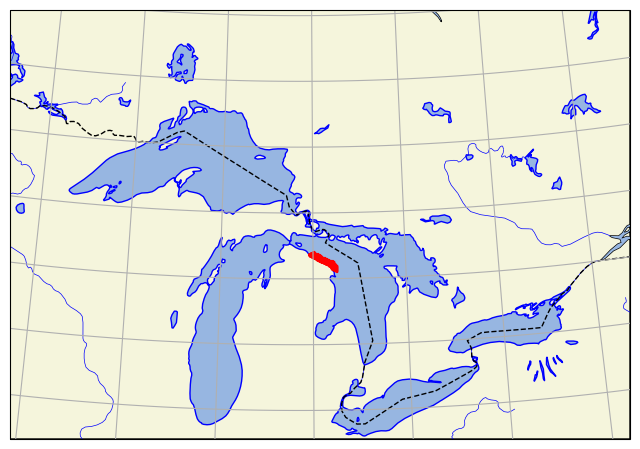

In [56]:
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.epsg(3174))

ax.plot(xparticle,yparticle,marker='<',markersize='5',color='r')  # didn't use transform, but looks ok..
ax.gridlines()
ax.set_global()
resol = '50m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='b', facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(land, facecolor='beige')
ax.add_feature(ocean, linewidth=0.2 )
ax.add_feature(lakes)
ax.add_feature(rivers, linewidth=0.5)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)

#plt.show()
plt.savefig('nutrient.jpeg',dpi=200)